In [30]:
import sys
sys.path.insert(0, "/Users/aron/polybox/Projects/b_significant")

import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import pandas as pd

from functions.eval_functions import pval_mac

In [126]:
n_totals = [
    1000,
    2000,
    3000,
    4000,
    5000,
    7000,
    10000,
    15000,
    20000,
    25000,
    30000,
    35000,
    40000,
    50000,
]
delta_bs = np.arange(0, 1.025, 0.025)

all_permutations = [
    i
    for i in it.product(
        n_totals,
        delta_bs,
    )
]
all_permutations = np.array(all_permutations)

# parameter vectors to run through with cl_idx
cl_n_totals = all_permutations[:, 0].astype(int)
cl_delta_bs = all_permutations[:, 1]

def get_string_data(cl_idx):
    save_str = (
            "results/resolution/constant_idx/"
            "acf_mean" + str(cl_idx) + ".csv"
        )
    return save_str


def get_df(cl_idx):
    all_delta_bs = []
    all_n_totals = []
    all_acfs = []
    all_n_series_used = []

    for cl_idx in range(len(cl_n_totals)):
        save_str = get_string_data(cl_idx)
        try :
            acfs = np.genfromtxt('../'+save_str, delimiter=',')
        except :
            acfs = []
        try :
            n_series_used = np.genfromtxt('../'+save_str.replace("acf_mean", "n_used_mean"), delimiter=',')
        except :
            n_series_used = []

        all_delta_bs.extend([cl_delta_bs[cl_idx]]*len(acfs))
        all_n_totals.extend([cl_n_totals[cl_idx]]*len(acfs))
        all_acfs.extend(acfs)
        all_n_series_used.extend(n_series_used)

    # make a dataframe
    df = pd.DataFrame({
        "acf": all_acfs,
        "delta b": all_delta_bs,
        "n_total": all_n_totals,
        "n_series_used": all_n_series_used,
    })
    return df

In [127]:
df = get_df(0)

In [128]:
# add a new collum to the dataframe

df["p_val"] = pval_mac(np.array(df["acf"]), np.array(df["n_series_used"]),cutting="constant_idx")

In [129]:
df

,acf,delta b,n_total,n_series_used,p_val
0,0.018415,0.0,1000,99.111111,0.360827
1,-0.120930,0.0,1000,99.111111,0.917014
2,0.094164,0.0,1000,99.111111,0.096296
3,0.010612,0.0,1000,99.111111,0.397922
4,0.023891,0.0,1000,99.111111,0.335534
...,...,...,...,...,...
43995,0.951311,1.0,35000,99.002865,0.000000
43996,0.941777,1.0,35000,99.002865,0.000000
43997,0.942929,1.0,35000,99.002865,0.000000
43998,0.956338,1.0,35000,99.002865,0.000000


In [130]:
sum(df['delta b']==0.15)

0

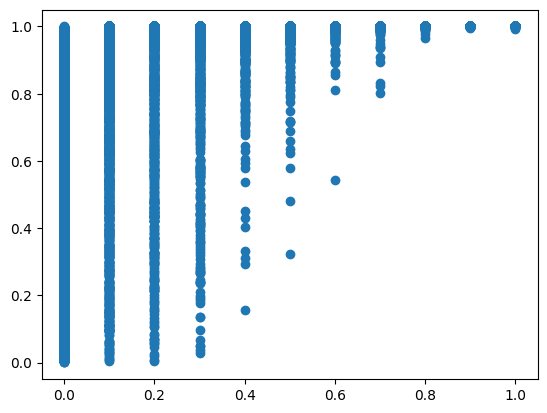

In [131]:
plt.scatter(df['delta b'], 1-df['p_val'])

In [132]:
# make contour plot od p-values

# make a grid of the parameters
delta_bs = np.unique(df['delta b'])
n_totals = np.unique(df['n_total'])

# for each parameter, get the quantiles of the p-values
p_val_grid = np.zeros((len(delta_bs), len(n_totals)))
for ii, delta_b in enumerate(delta_bs):
    for jj, n_total in enumerate(n_totals):
        p_val_grid[ii, jj] = np.quantile(1-df[(df['delta b'] == delta_b) & (df['n_total'] == n_total)]['p_val'], 0.05)


In [133]:
delta_bs = np.unique(df['delta b'])


In [134]:
delta_bs

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

Text(0, 0.5, 'delta b')

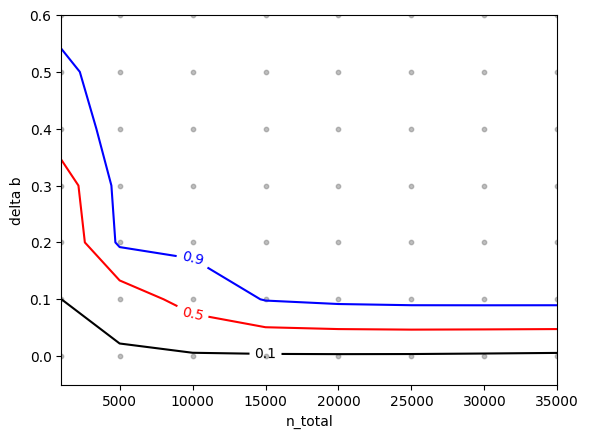

In [137]:
# plot the contour plot
plt.figure()
Contourrange = [0.1,0.5,0.9]
CS = plt.contour(n_totals, delta_bs, p_val_grid, levels=Contourrange, colors=['k','r','b'])
plt.clabel(CS, fontsize=10, inline=1)


# plot grid points
for ii, delta_b in enumerate(delta_bs):
    for jj, n_total in enumerate(n_totals):
        plt.scatter(n_total, delta_b, color='grey', alpha=0.5, s=10)
plt.ylim(-0.05, 0.6)

plt.xlabel('n_total')
plt.ylabel('delta b')